# LINEAR REGRESSION 

# project :Algerian forest fire 

# This is the dataset of algerian forest fire taken from UCI Machine Learning Repository

.The data set consist of 14 columns and 246 rows 


# Import some importaint Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

# Atribute information about the dataset

.Temp : temperature noon 

.RH : Relative Humidity in %: 21 to 90

.Ws :Wind speed in km/h: 6 to 29

.Rain: total day in mm: 0 to 16.8

.Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

.Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

.Drought Code (DC) index from the FWI system: 7 to 220.4

.Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

.Buildup Index (BUI) index from the FWI system: 1.1 to 68

.Fire Weather Index (FWI) Index: 0 to 31.1

.Classes: two classes, namely 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.shape

(246, 14)

In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#  Exploratory Data Analysis and data cleaning

In [10]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [11]:
df.drop([122,123] , inplace = True)

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [13]:
df.reset_index(inplace=True)
df.drop('index', axis=1,inplace=True)

In [14]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df.dropna(inplace=True)

In [19]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [21]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [22]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [23]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [24]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int32
dtype: object

In [25]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [27]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [28]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [29]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [30]:
df.drop(['year'],axis=1 ,inplace =True)

In [31]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [32]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [33]:
df['Classes']=np.where(df['Classes'] == 'not fire ' ,0,1)

In [34]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [35]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,NaN,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,NaN,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,NaN,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,NaN,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,NaN,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,NaN,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,NaN,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,NaN,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,NaN,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,NaN,0.263197


# visualization some plots with the help of seaborn

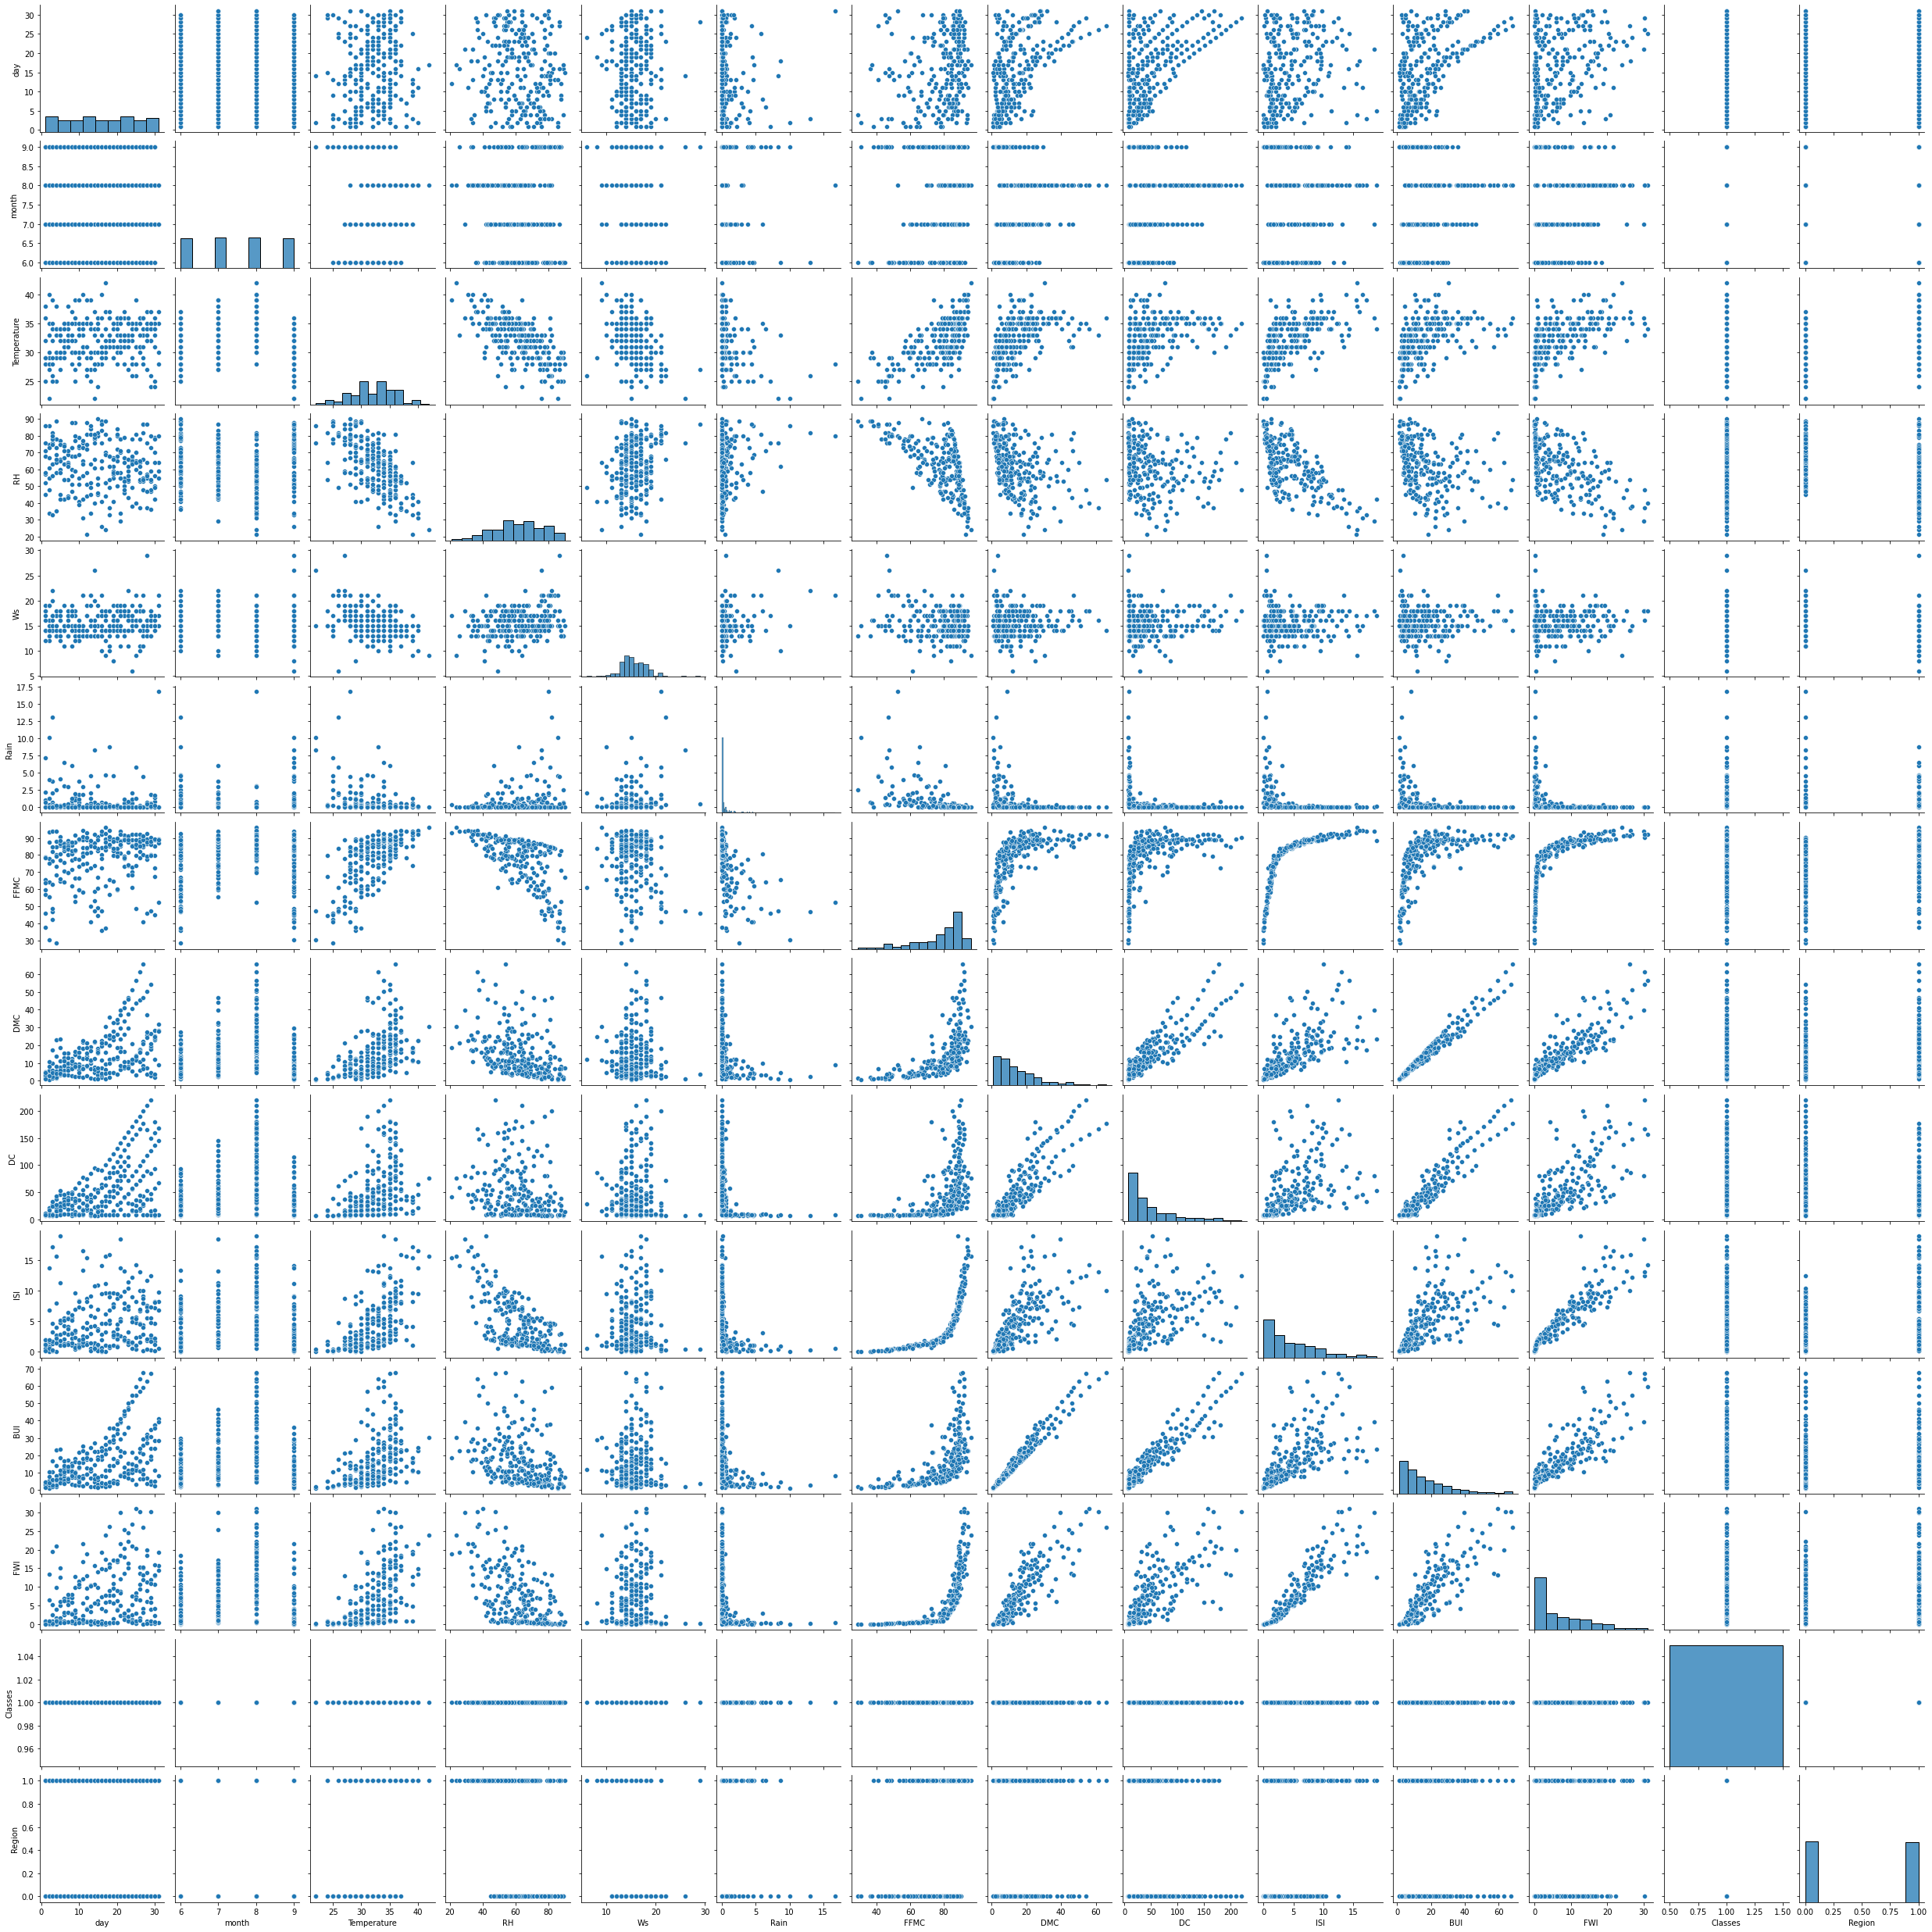

In [36]:
sns.pairplot(df)

<AxesSubplot:>

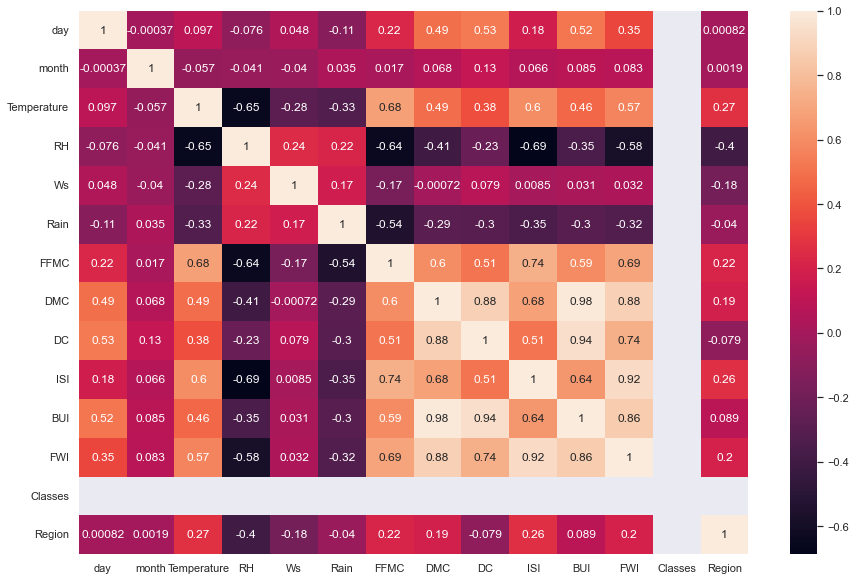

In [38]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Temperature')

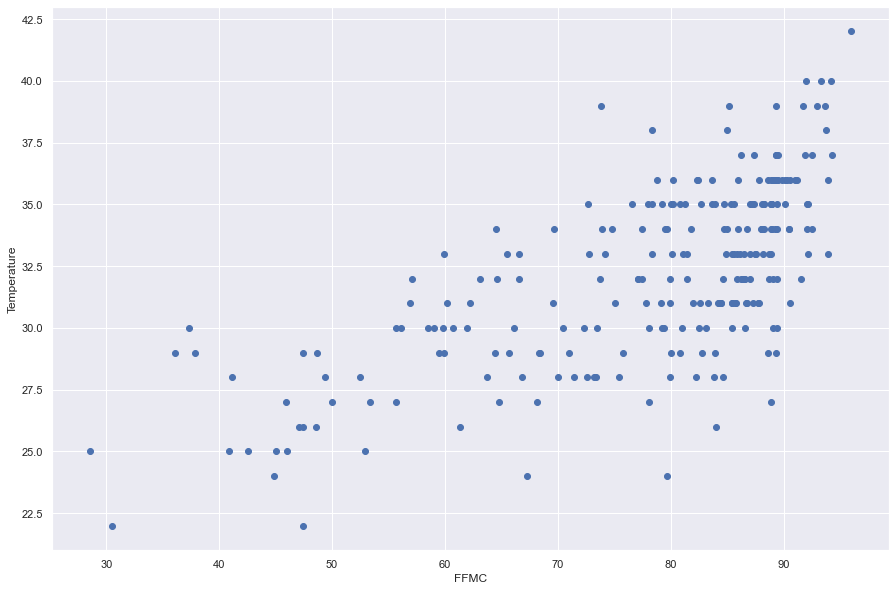

In [39]:
plt.scatter(df['FFMC'],df['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

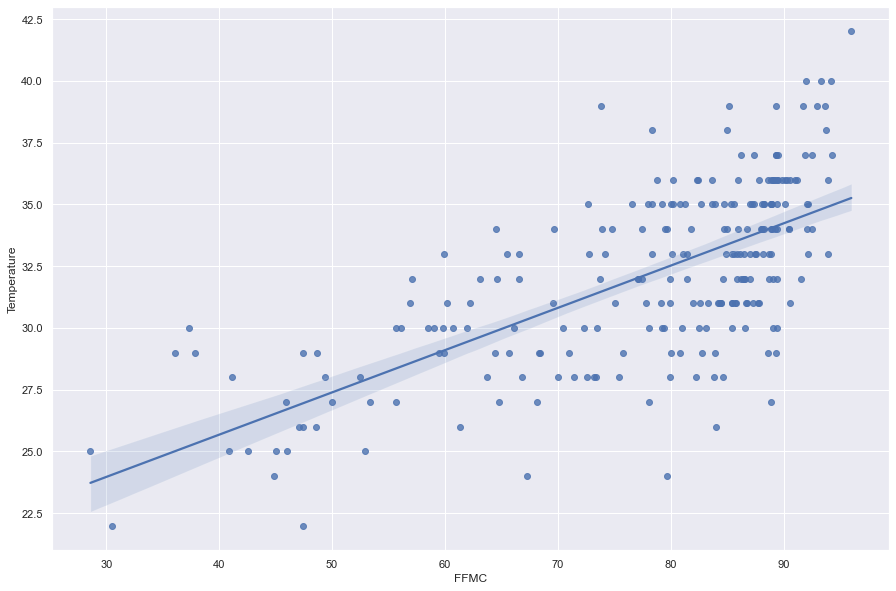

In [40]:
sns.regplot(x = 'FFMC' , y='Temperature' , data=df)

Text(0, 0.5, 'Temperature')

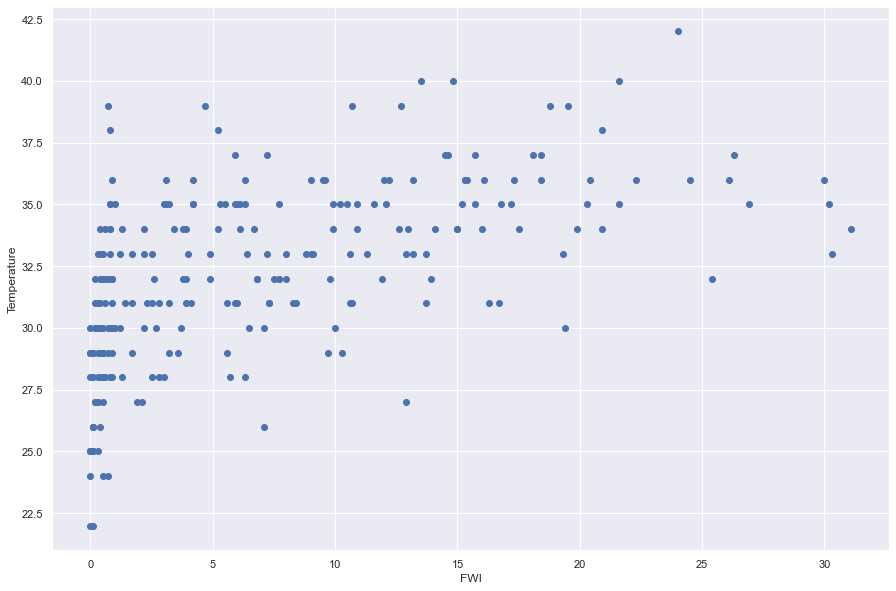

In [41]:
plt.scatter(df['FWI'],df['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

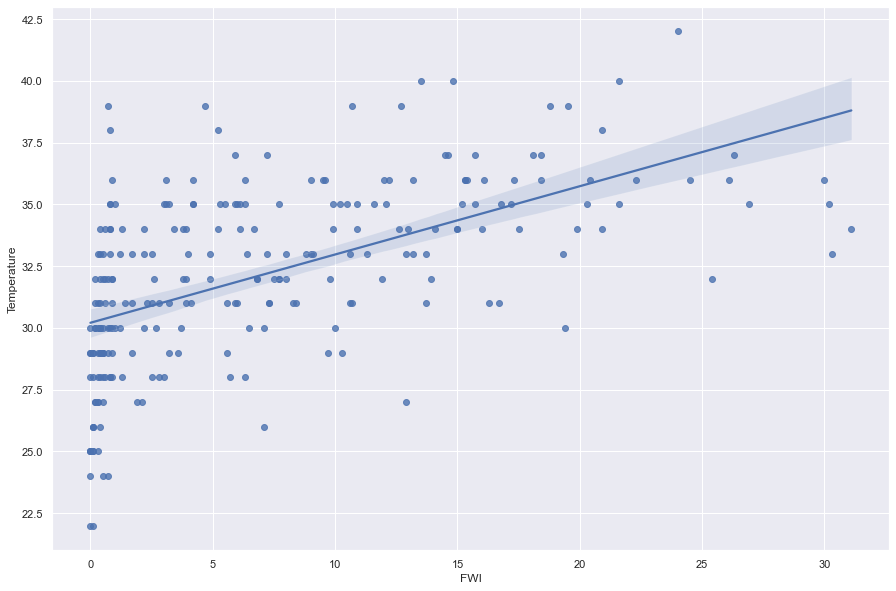

In [42]:
sns.regplot(x='FWI',y='Temperature',data=df)

Text(0, 0.5, 'Temperature')

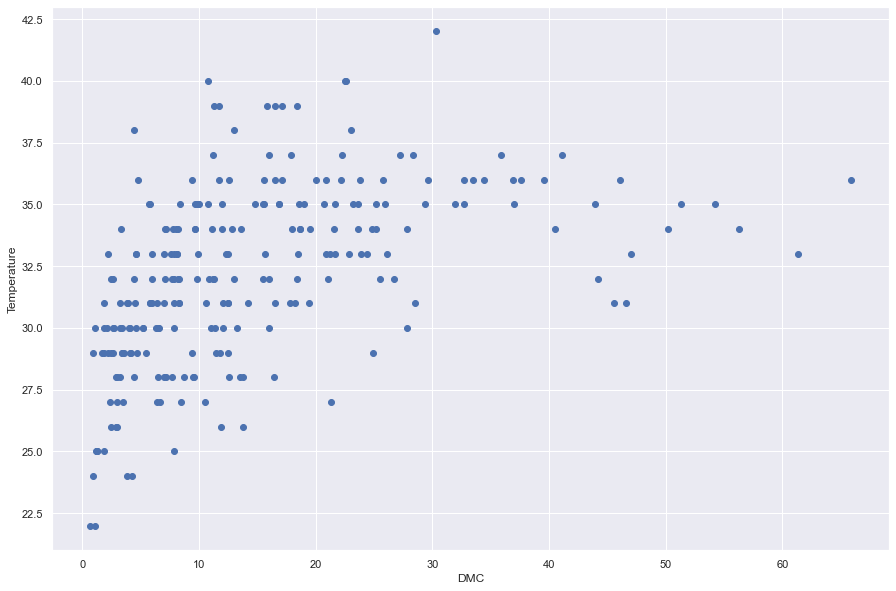

In [43]:
plt.scatter(df['DMC'],df['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

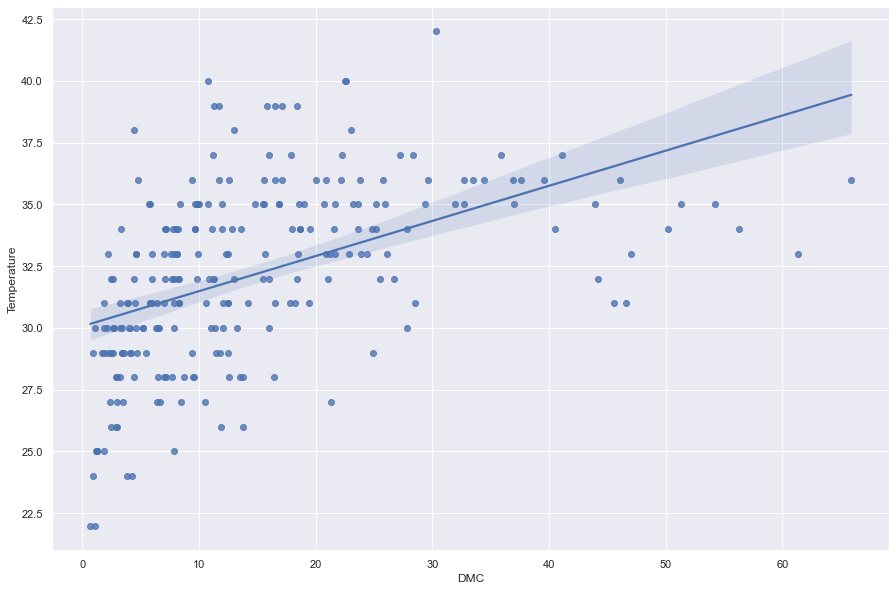

In [44]:
sns.regplot(x='DMC',y='Temperature',data=df)

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

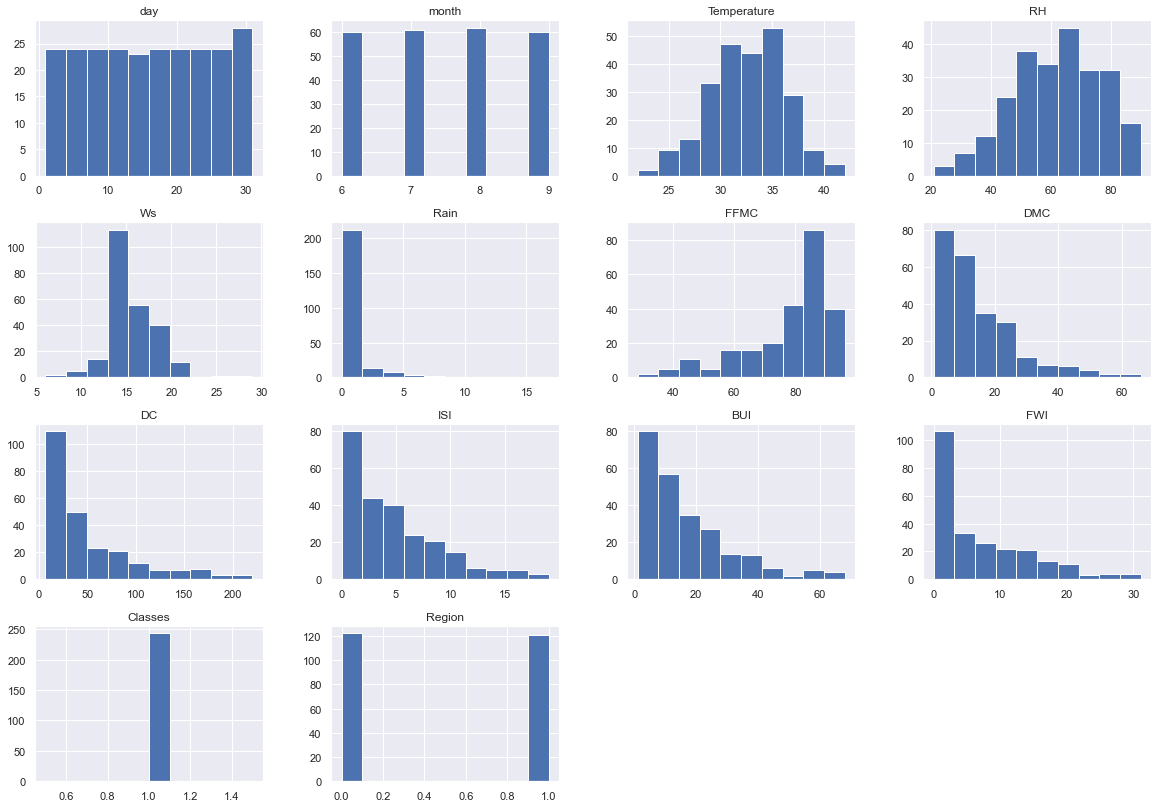

In [45]:
df.hist(figsize=(20,14),color='b')

<AxesSubplot:xlabel='Temperature'>

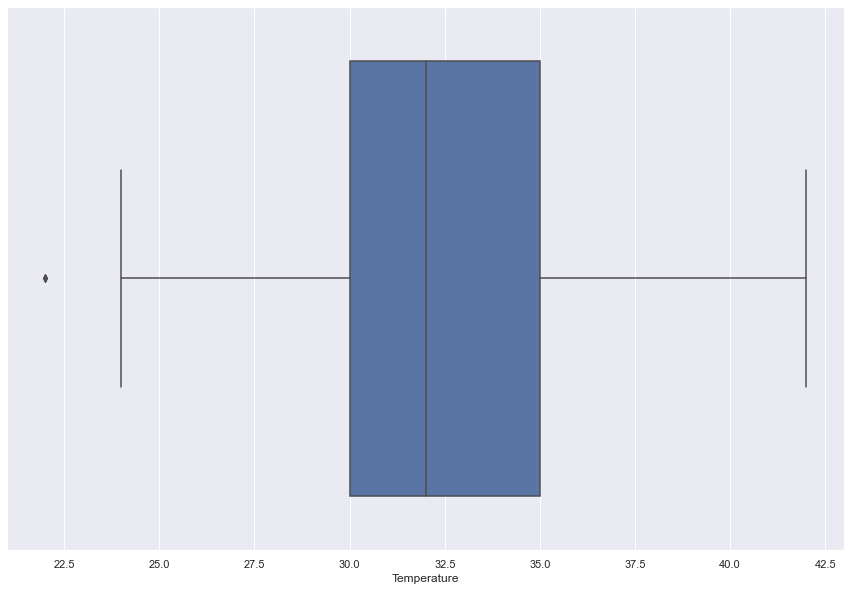

In [46]:
sns.boxplot(df["Temperature"])

<AxesSubplot:xlabel='FWI'>

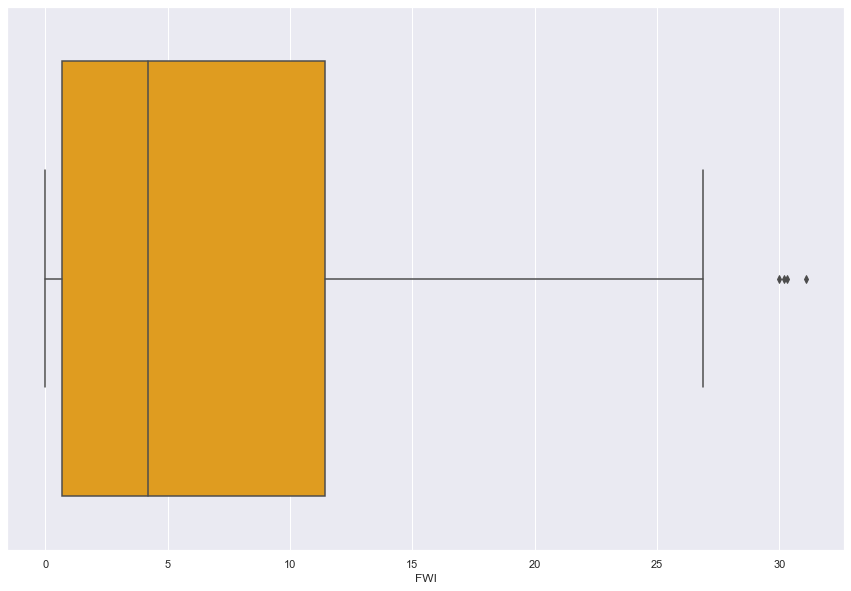

In [47]:
sns.boxplot(df['FWI'],color='orange')

# building linear regression model

In [49]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:
x=df.drop(['Temperature'] , axis=1)

In [52]:
y=df['Temperature']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [54]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,1,0
174,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1,1
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,1,0
186,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1,0
229,16,9,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,1,1
125,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1,1


In [55]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,17,7,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,0
226,13,9,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1,1
181,30,7,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,1,1
116,25,9,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,1,0
124,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,6,6,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,1,1
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
208,26,8,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1,1
102,11,9,77,21,1.8,58.5,1.9,8.4,1.1,2.4,0.3,1,0


In [56]:
y_train

25     31
121    25
174    31
72     35
186    38
       ..
64     34
15     29
229    33
125    30
9      28
Name: Temperature, Length: 162, dtype: int32

In [57]:
y_test

46     29
226    29
181    36
116    26
124    29
       ..
127    35
242    24
208    33
102    30
78     36
Name: Temperature, Length: 81, dtype: int32

In [58]:
scaler =StandardScaler()

In [59]:
x_train =scaler.fit_transform(X_train)

In [60]:
x_train

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
         0.        , -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
         0.        , -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
         0.        ,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
         0.        ,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
         0.        ,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
         0.        , -1.01242284]])

In [61]:
x_test=scaler.transform(X_test)

In [62]:
x_test

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
         0.        , -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
         0.        ,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
         0.        ,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
         0.        ,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
         0.        , -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
         0.        , -1.01242284]])

# Model training

In [64]:
regression= LinearRegression()

In [65]:
regression

LinearRegression()

In [66]:
regression.fit(x_train,y_train)

LinearRegression()

In [67]:
print(regression.coef_)

[-0.36440793 -0.22635361 -1.44134283 -0.7142619  -0.23278709  0.96421264
 -0.01542755  0.65162217  0.13076922  0.26277398 -0.28088408  0.
  0.24272792]


In [68]:
print(regression.intercept_)

32.074074074074076


# prediction for the test data


In [128]:
reg_pred=regression.predict(x_test)

In [70]:
reg_pred

array([31.84063173, 33.08286672, 33.29508782, 24.75854227, 29.24684893,
       33.62257975, 31.75352242, 34.58358479, 31.72328528, 32.36866716,
       33.67767751, 33.25839479, 35.65738396, 31.97503396, 34.04296478,
       33.22479669, 26.47624061, 36.04714436, 33.19344089, 23.64162513,
       32.1343707 , 32.60093493, 33.02495519, 32.94209422, 29.99121682,
       32.68893888, 33.04332061, 32.27268269, 32.09347766, 34.07041738,
       34.51057574, 33.74628677, 34.33569821, 32.69179752, 31.163211  ,
       28.76146317, 32.70115088, 31.76403503, 33.04719502, 34.07436881,
       33.80864285, 35.5411224 , 34.22166608, 37.18514799, 32.83625502,
       36.64474361, 32.38777677, 35.33018647, 30.75190986, 30.94859328,
       32.28439034, 39.1982583 , 32.58656685, 34.55522617, 27.14324627,
       36.9254135 , 33.79514082, 33.90475288, 29.13300329, 32.27931989,
       32.48201446, 32.01342537, 24.82170293, 36.32093954, 36.06160239,
       29.12469145, 29.4759838 , 29.4409954 , 36.02022222, 28.49

# ASSUMPTIONS OF LINEAR REGRESSION

Text(0, 0.5, 'Test Predicted Data')

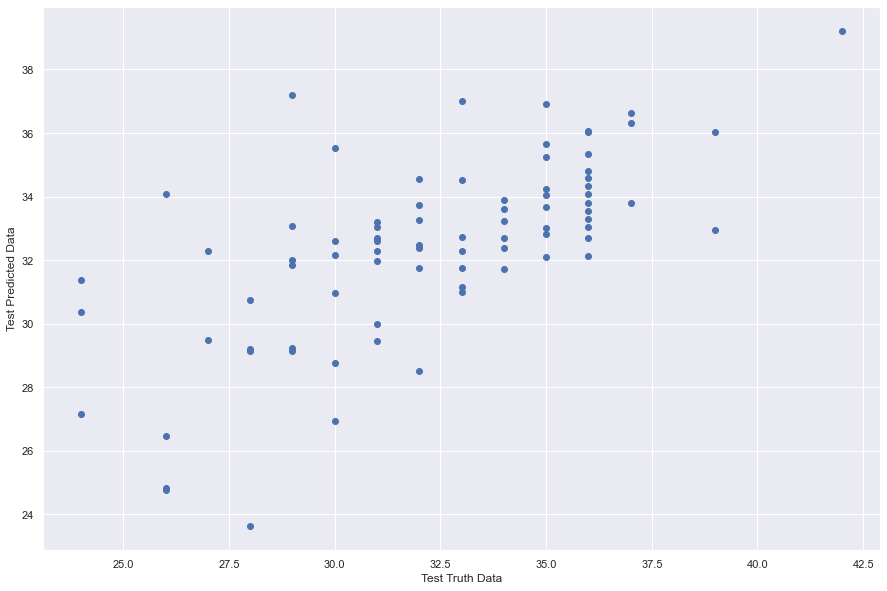

In [72]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [73]:
residuals=y_test-reg_pred

In [74]:
residuals

46    -2.840632
226   -4.082867
181    2.704912
116    1.241458
124   -0.246849
         ...   
127   -0.236261
242   -7.373266
208   -4.001972
102    3.070165
78     2.442408
Name: Temperature, Length: 81, dtype: float64

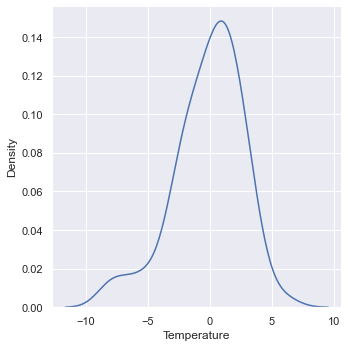

In [75]:
sns.displot(residuals,kind="kde")

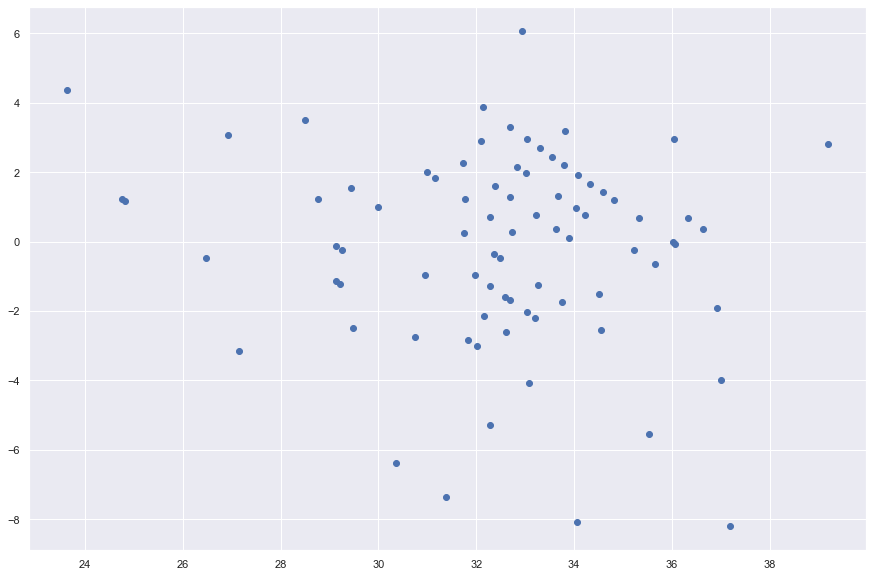

In [76]:
plt.scatter(reg_pred,residuals)

# 3 perfomance matrics

In [78]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


7.718372490369676
2.1359729920427832
2.77819590568586


In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [80]:
#### adjusted r squre

In [81]:
score = r2_score(y_test,reg_pred)

In [82]:
score

0.44243545858676725

In [83]:
score=r2_score(y_test,reg_pred)
score

0.44243545858676725

In [84]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.334251293834946

# ridge  regression

In [86]:
ridge=Ridge()

In [87]:
ridge.fit(x_train,y_train)

Ridge()

In [88]:
print(ridge.coef_)

[-0.35859242 -0.22361881 -1.4246319  -0.71357223 -0.23419537  0.96377519
  0.02101355  0.62937949  0.10421058  0.21661456 -0.22339104  0.
  0.23878478]


In [89]:
print(ridge.intercept_)

32.074074074074076


In [90]:
ridge_pred=ridge.predict(x_test)

In [91]:
ridge_pred

array([31.84522025, 33.07801866, 33.32143372, 24.79311009, 29.25112242,
       33.64529216, 31.73250629, 34.61248132, 31.74324356, 32.36616109,
       33.66795511, 33.25653199, 35.63844353, 31.96899817, 33.96914585,
       33.23538038, 26.51482354, 36.03947803, 33.1811996 , 23.66716673,
       32.09793728, 32.58109242, 33.0232019 , 32.94038806, 29.98560291,
       32.70770994, 33.04393524, 32.25760392, 32.08900203, 34.04925765,
       34.50009163, 33.73910985, 34.31012523, 32.69207555, 31.13817866,
       28.77144618, 32.67740941, 31.75746455, 33.04099284, 34.04747401,
       33.83814527, 35.52736647, 34.22117957, 37.13751492, 32.83627381,
       36.68161808, 32.36960708, 35.31854183, 30.73882088, 30.95562496,
       32.291368  , 39.20825907, 32.57797449, 34.55202448, 27.17475543,
       36.9522104 , 33.81487792, 33.86236693, 29.15322938, 32.26413039,
       32.47914425, 32.00320521, 24.82974268, 36.34245785, 36.10298328,
       29.15073976, 29.45086263, 29.43904153, 36.0418111 , 28.50

Text(0, 0.5, 'Test Predicted Data')

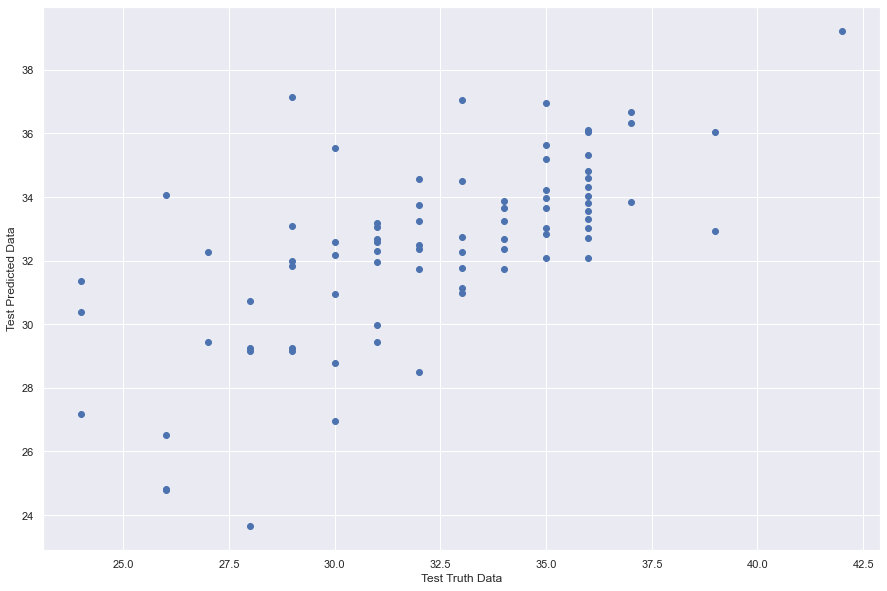

In [92]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [93]:
residuals=y_test-ridge_pred

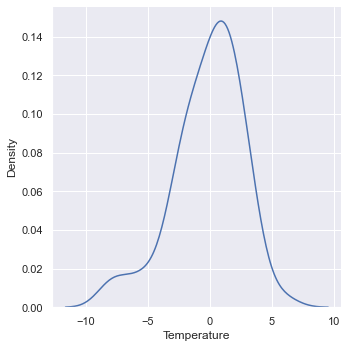

In [94]:
sns.displot(residuals,kind="kde")

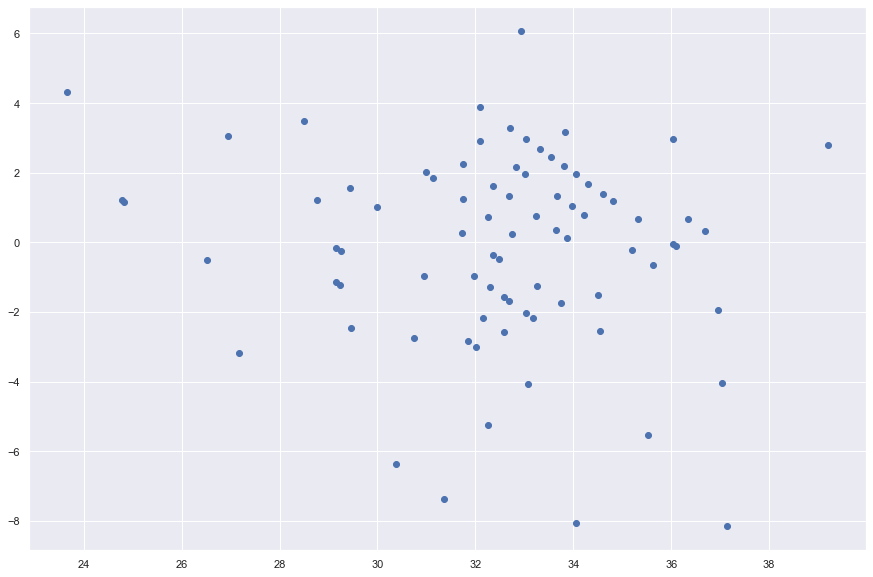

In [95]:
plt.scatter(ridge_pred,residuals)

In [96]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.700169527845214
2.1363570878417484
2.774917931731534


In [97]:
score=r2_score(y_test,reg_pred)
score

0.44243545858676725

In [98]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.334251293834946

# lasso regression

In [100]:
lasso=Lasso()

In [101]:
lasso

Lasso()

In [102]:
lasso.fit(x_train,y_train)

Lasso()

In [103]:
print(lasso.coef_)

[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.          0.
  0.        ]


In [104]:
print(lasso.intercept_)

32.074074074074076


In [105]:
lasso_pred = lasso.predict(x_test)

In [106]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

Text(0, 0.5, 'Test Predicted Data')

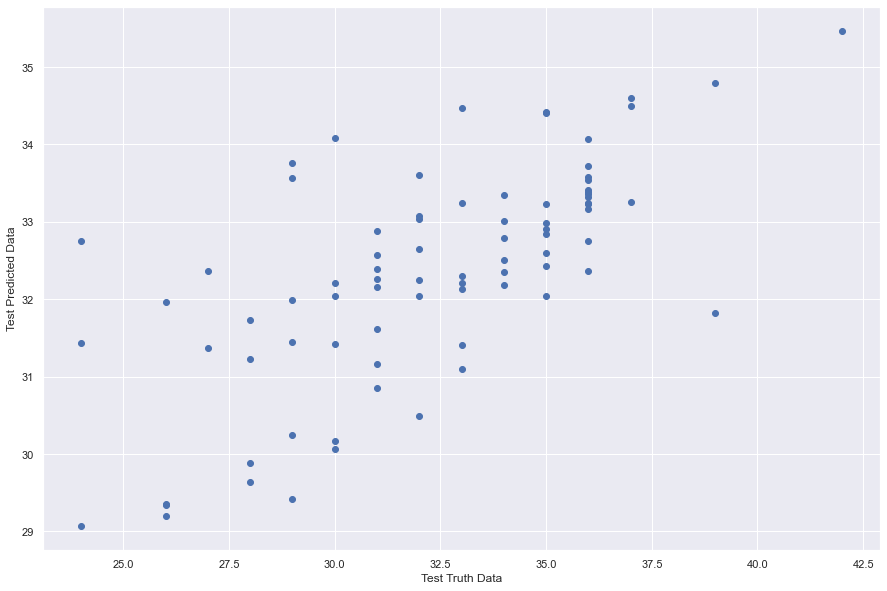

In [107]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [108]:
residuals=y_test-lasso_pred

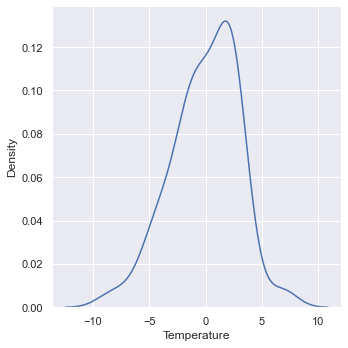

In [109]:
sns.displot(residuals,kind="kde")

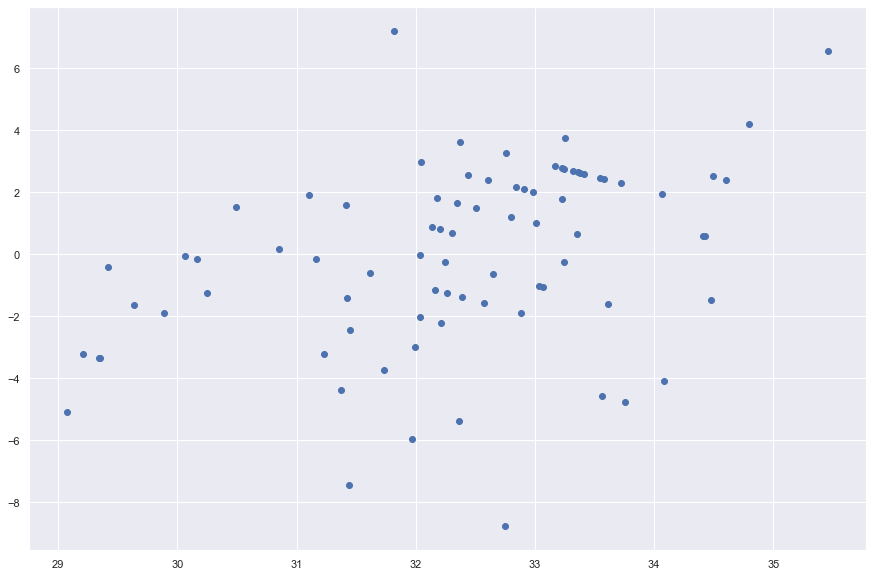

In [110]:
plt.scatter(lasso_pred,residuals)

In [111]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


In [112]:
score=r2_score(y_test,lasso_pred)
score

0.3719123543887275

In [113]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.250044602255197

# Elasticnet

In [115]:
elasticnet=ElasticNet()

In [116]:
elasticnet.fit(x_train,y_train)

ElasticNet()

In [117]:
print(elasticnet.coef_)

[-0.         -0.         -0.77155493 -0.27327033 -0.02945645  0.70980198
  0.11177449  0.          0.20914599  0.04593431  0.12829249  0.
  0.        ]


In [118]:
print(elasticnet.intercept_)

32.074074074074076


In [119]:
elasticnet_pred=elasticnet.predict(x_test)

In [120]:
elasticnet_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

Text(0, 0.5, 'Test Predicted Data')

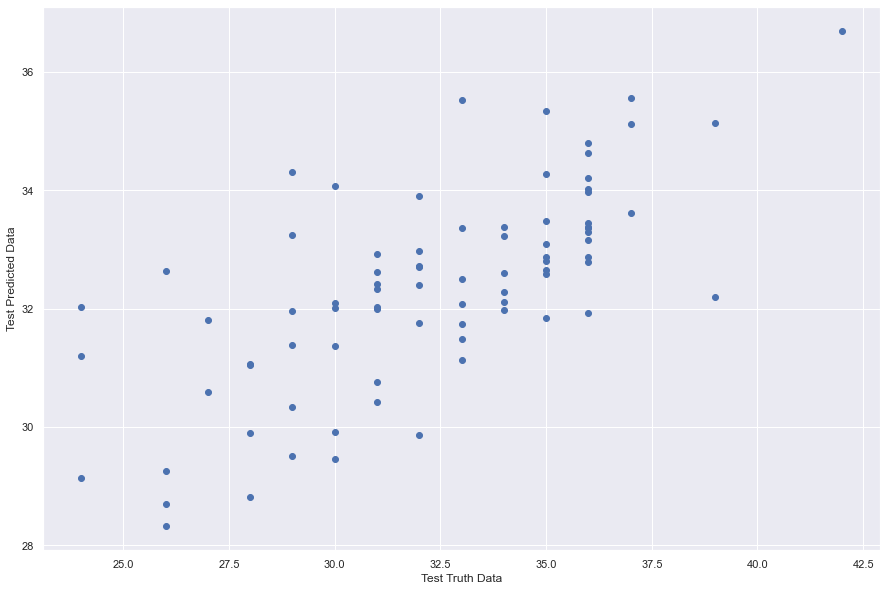

In [121]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [122]:
residuals=y_test-elasticnet_pred

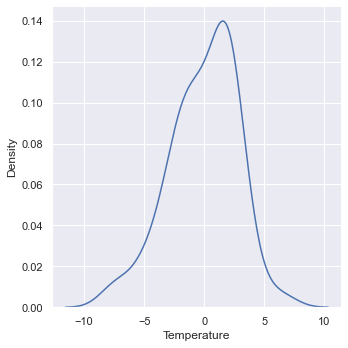

In [123]:
sns.displot(residuals,kind="kde")

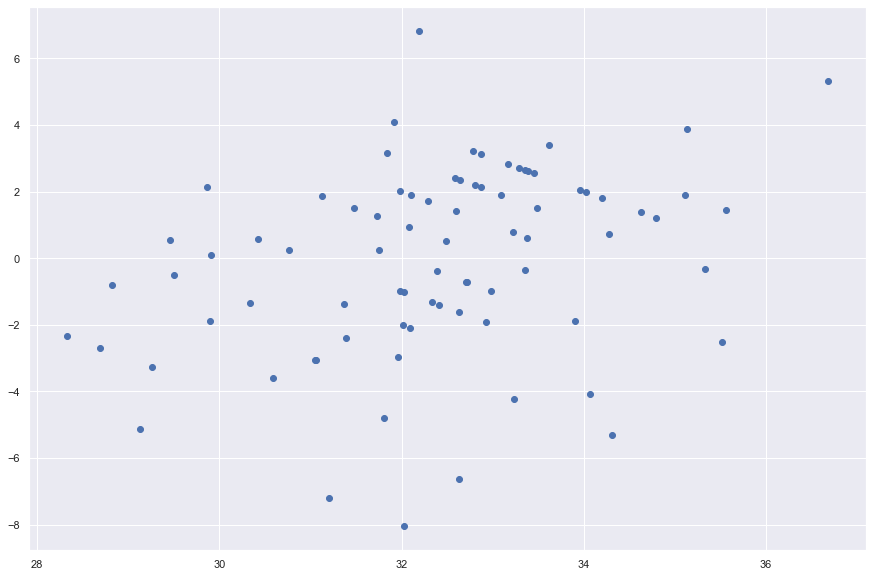

In [124]:
plt.scatter(elasticnet_pred,residuals)

In [125]:
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))
7.918267418307838

7.918267418307838
2.2796482511865195
2.813941616009088


7.918267418307838

In [126]:
score=r2_score(y_test,elasticnet_pred)
score

0.4279953257782334

In [127]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.317009344212816